In [8]:
#importing the required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, exp, Mul , pi, sqrt, DiracDelta
import seaborn as sns

from sympy.utilities.lambdify import lambdify
import pandas as pd
import csv
from scipy.stats import norm
import math

In [9]:
csv_file = './Data/daily_data.csv'#make sure to have the Labels column
# csv_file = 'csv_all.csv'
dataset = pd.read_csv(csv_file)

datasetNP = dataset.iloc[:, :17].values
print(dataset.head())
print(datasetNP.shape)

  day_id city_id  temperature_celsius  wind_kph  wind_degree  pressure_mb  \
0  D0001    C001                 27.0       6.1          210         1006   
1  D0002    C001                 22.0       6.1          170         1006   
2  D0003    C001                 20.0       3.6           10         1011   
3  D0004    C001                 17.0       6.1          150         1018   
4  D0005    C001                 18.0       3.6           92         1019   

   precip_mm  humidity  cloud  feels_like_celsius  visibility_km  uv_index  \
0        0.0        54     75                28.0           10.0         6   
1        0.0        73     75                24.5           10.0         1   
2        4.5       100     75                20.0           10.0         1   
3        0.0        88      0                17.0           10.0         1   
4        0.0        94      0                18.0           10.0         1   

   gust_kph  air_quality_us-epa-index  sunrise   sunset  \
0      11

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   wind_kph                  2893 non-null   float64
 4   wind_degree               2893 non-null   int64  
 5   pressure_mb               2893 non-null   int64  
 6   precip_mm                 2893 non-null   float64
 7   humidity                  2893 non-null   int64  
 8   cloud                     2893 non-null   int64  
 9   feels_like_celsius        2893 non-null   float64
 10  visibility_km             2893 non-null   float64
 11  uv_index                  2893 non-null   int64  
 12  gust_kph                  2893 non-null   float64
 13  air_quality_us-epa-index  2893 non-null   int64  
 14  sunrise 

In [11]:
dataset.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [14]:
dataset['feels_like_celsius'].value_counts()

feels_like_celsius
19.0    138
16.0    137
17.0    123
18.0    120
21.0    119
       ... 
5.0       1
23.3      1
2.7       1
3.4       1
18.6      1
Name: count, Length: 394, dtype: int64

In [5]:
df_num=dataset[['temperature_celsius', 'wind_kph','wind_degree', 'pressure_mb','precip_mm', 'humidity', 'cloud','feels_like_celsius','visibility_km','uv_index','gust_kph','air_quality_us-epa-index']]


df_label=dataset[['condition_text','sunrise','sunset']]

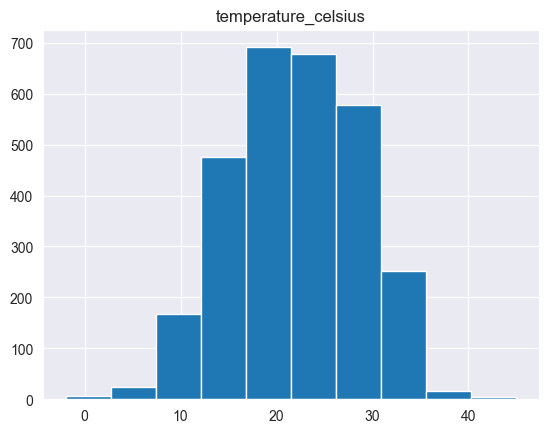

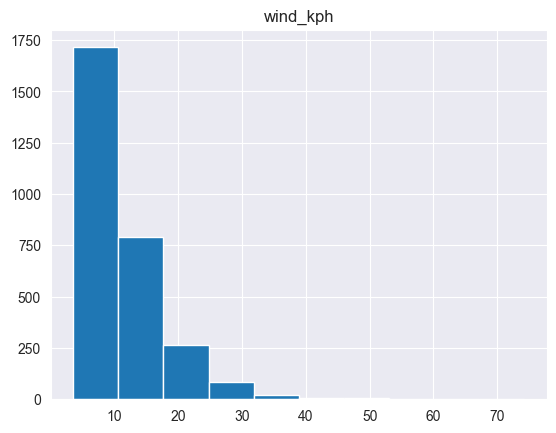

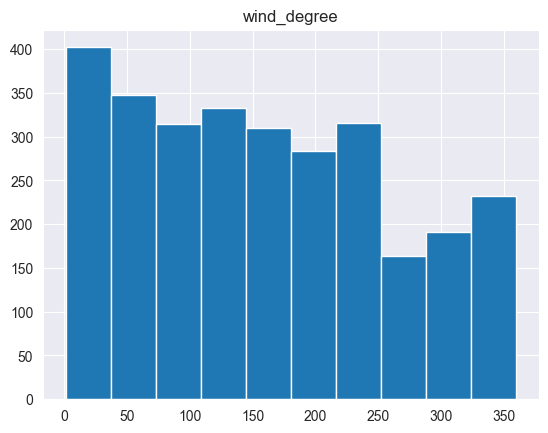

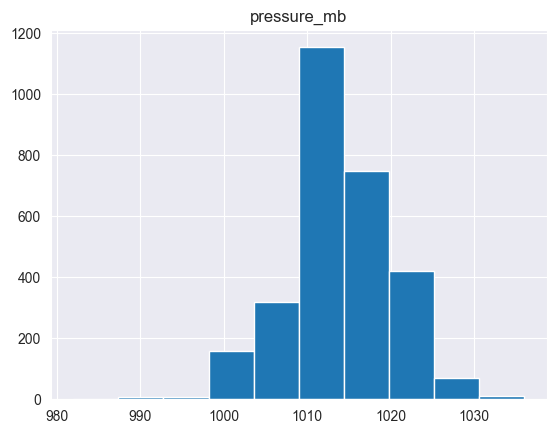

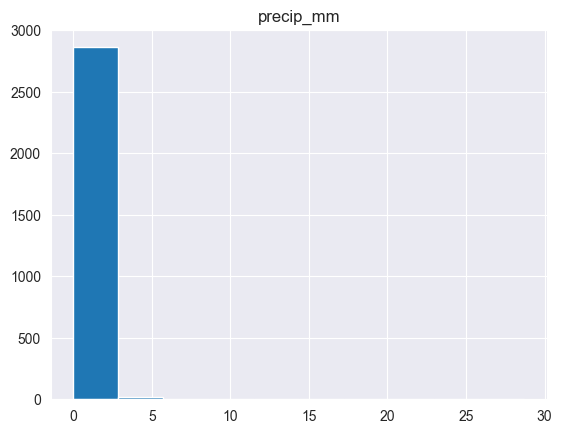

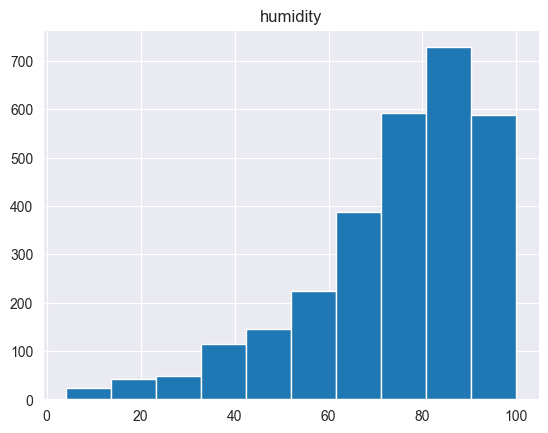

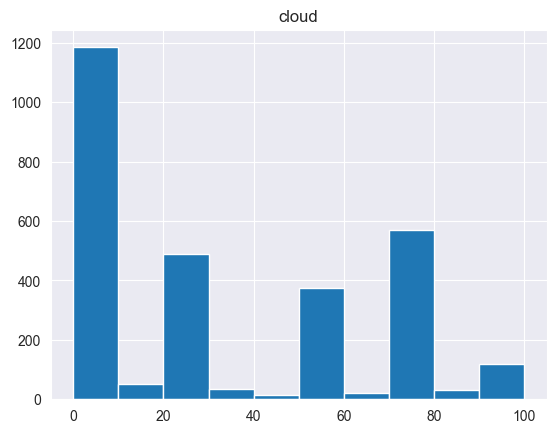

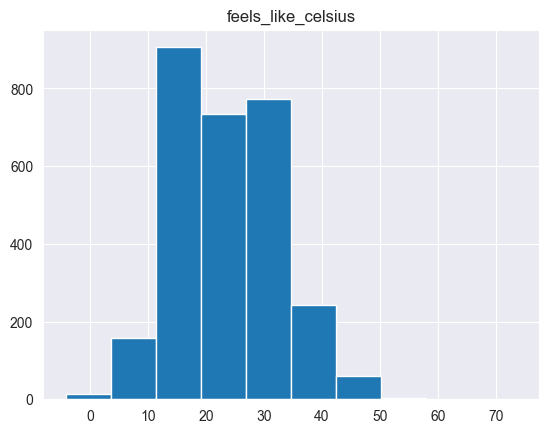

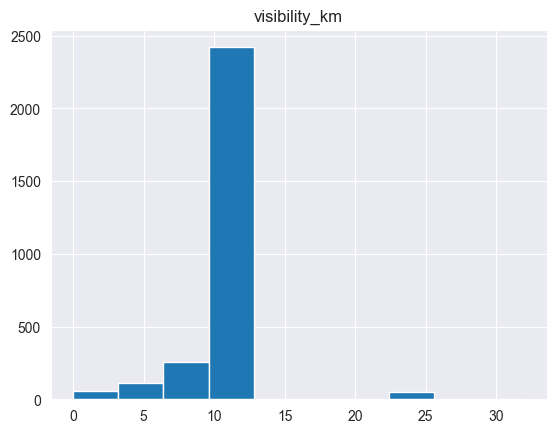

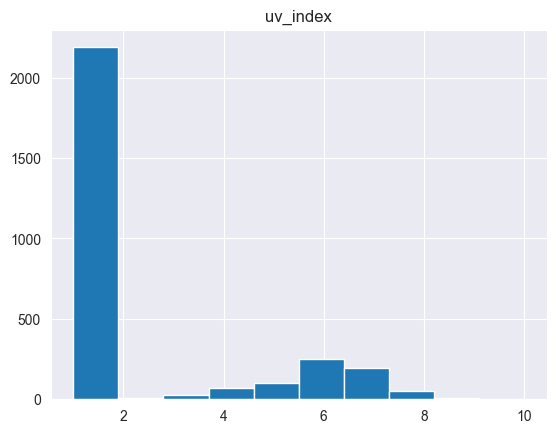

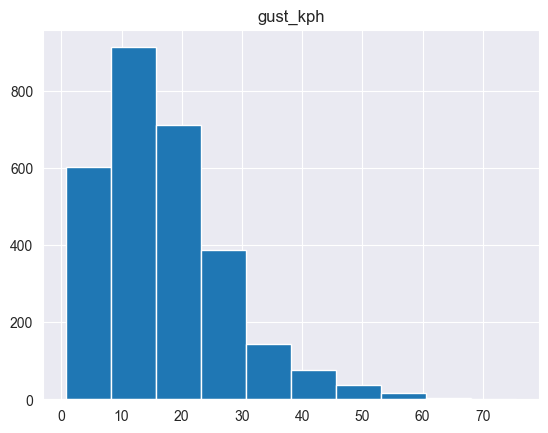

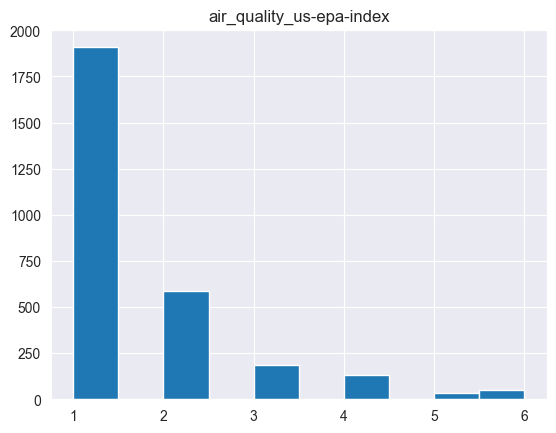

In [6]:
# distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: >

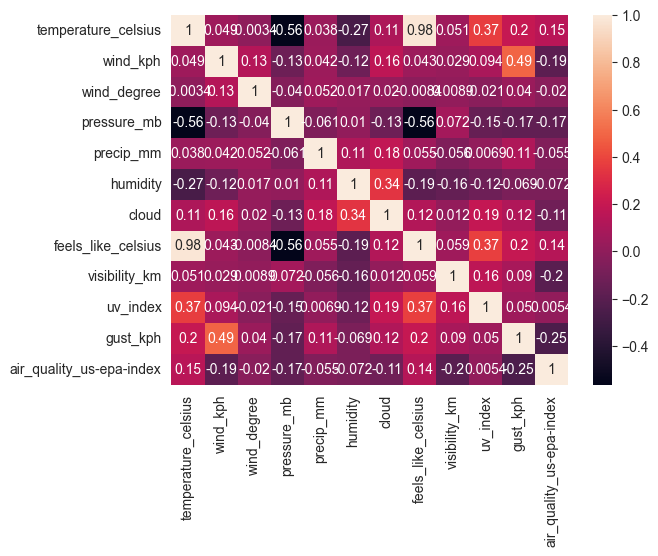

In [7]:
# print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True)

In [8]:
training_set = dataset[dataset['condition_text'].notnull()]
pred_set = dataset[dataset['condition_text'].isnull()]



In [9]:
conditions = training_set['condition_text'].unique()
features =list(training_set.columns)
print(conditions)
print(features)

['Light Rain with Thunder' 'Clear and Sunny' 'Partly Cloudy'
 'Light Precipitation' 'Cloudy and Overcast' 'Mist or Fog' 'Rain Showers'
 'Moderate to Heavy Rain' 'Thunderstorms']
['day_id', 'city_id', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'condition_text']


In [10]:
def convert_label_to_numerical(condition_text):
    if condition_text == 'Clear and Sunny':
        return int(0)
    elif condition_text == 'Partly Cloudy':
        return int(1)
    elif condition_text == 'Light Precipitation':
        return int(2)
    elif condition_text == 'Cloudy and Overcast':
        return int(3)
    elif condition_text == 'Mist or Fog':
        return int(4)
    elif condition_text == 'Rain Showers':
        return int(5)
    elif condition_text == 'Light Rain with Thunder':
        return int(6)
    elif condition_text == 'Thunderstorms':
        return int(7)
    elif condition_text == 'Moderate to Heavy Rain':
        return int(8)
    else:
        return None
    
    
def convert_numerical_to_label(num): # fix this
    if num == 0:
        return 'Clear and Sunny'
    elif num == 1:
        return 'Partly Cloudy'
    elif num == 2:
        return 'Light Precipitation'
    elif num == 3:
        return 'Cloudy and Overcast'
    elif num == 4:
        return 'Mist or Fog'
    elif num == 5:
        return 'Rain Showers'
    elif num == 6:
        return 'Light Rain with Thunder'
    elif num == 7:
        return 'Thunderstorms'
    elif num == 8:
        return 'Moderate to Heavy Rain'
    else:
        return None
    
    
def convert_time(timeString):
    # print(timeString)
    t = timeString.split(' ')
    if t[1] == 'AM':
        return int(int(t[0].split(':')[0])*60 + int(int(t[0].split(':')[1])))
    else:
        return int(int(t[0].split(':')[0])*60 + int(int(t[0].split(':')[1])) + 720)

In [11]:
df = training_set['sunrise'].values.tolist()   # convert to list
print(df[0])
print(convert_time('4:30 PM'))

6:05 AM
990


In [12]:
training_set['condition_text'] = training_set['condition_text'].apply(convert_label_to_numerical)
training_set['sunrise'] = training_set['sunrise'].apply(convert_time)
training_set['sunset'] = training_set['sunset'].apply(convert_time)
print(training_set.head())

   day_id city_id  temperature_celsius  wind_kph  wind_degree  pressure_mb  \
2   D0003    C001                 20.0       3.6           10         1011   
3   D0004    C001                 17.0       6.1          150         1018   
6   D0007    C001                 21.0       4.0          310         1015   
18  D0019    C001                 19.0       3.6           64         1017   
27  D0028    C002                 19.0       3.6           83         1010   

    precip_mm  humidity  cloud  feels_like_celsius  visibility_km  uv_index  \
2         4.5       100     75                20.0           10.0         1   
3         0.0        88      0                17.0           10.0         1   
6         0.0       100     50                21.0           10.0         1   
18        0.0        88      0                19.0           10.0         1   
27        0.0        73     25                19.0           10.0         1   

    gust_kph  air_quality_us-epa-index  sunrise  sunset 

C:\Users\pandu\AppData\Local\Temp\ipykernel_41652\4067927682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['condition_text'] = training_set['condition_text'].apply(convert_label_to_numerical)
C:\Users\pandu\AppData\Local\Temp\ipykernel_41652\4067927682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['sunrise'] = training_set['sunrise'].apply(convert_time)
C:\Users\pandu\AppData\Local\Temp\ipykernel_41652\4067927682.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [13]:
pred_set['sunrise'] = pred_set['sunrise'].apply(convert_time)
pred_set['sunset'] = pred_set['sunset'].apply(convert_time)

C:\Users\pandu\AppData\Local\Temp\ipykernel_41652\3673000960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_set['sunrise'] = pred_set['sunrise'].apply(convert_time)
C:\Users\pandu\AppData\Local\Temp\ipykernel_41652\3673000960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_set['sunset'] = pred_set['sunset'].apply(convert_time)


In [14]:
# Display the shapes of the resulting datasets
print("Dataset with 'condition_text' present:", training_set.shape)
print("Dataset with 'condition_text' absent:", pred_set.shape)

print(training_set.head())
print(pred_set.head())

Dataset with 'condition_text' present: (479, 17)
Dataset with 'condition_text' absent: (2414, 17)
   day_id city_id  temperature_celsius  wind_kph  wind_degree  pressure_mb  \
2   D0003    C001                 20.0       3.6           10         1011   
3   D0004    C001                 17.0       6.1          150         1018   
6   D0007    C001                 21.0       4.0          310         1015   
18  D0019    C001                 19.0       3.6           64         1017   
27  D0028    C002                 19.0       3.6           83         1010   

    precip_mm  humidity  cloud  feels_like_celsius  visibility_km  uv_index  \
2         4.5       100     75                20.0           10.0         1   
3         0.0        88      0                17.0           10.0         1   
6         0.0       100     50                21.0           10.0         1   
18        0.0        88      0                19.0           10.0         1   
27        0.0        73     25        

In [15]:
training_set.to_csv('training_set_cleaned.csv', index=False)
pred_set.to_csv('pred_cleaned.csv', index=False)

**NORMALIZATION**

In [16]:
from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('training_set_cleaned.csv')
df = pd.read_csv('pred_cleaned.csv')
# print(training_set.head())

id_columns = ['day_id','city_id', 'condition_text']
columns_to_normalize = ['temperature_celsius', 'wind_kph','wind_degree', 'pressure_mb','precip_mm', 'humidity', 'cloud','feels_like_celsius','visibility_km','uv_index','gust_kph','air_quality_us-epa-index', 'sunrise', 'sunset']


scaler = StandardScaler()

# Apply Z-Score normalization only to the relevant columns
df_normalized_values = scaler.fit_transform(df[columns_to_normalize])

# Create a DataFrame from the normalized values
df_normalized = pd.DataFrame(df_normalized_values, columns=columns_to_normalize)

# Combine the ID columns with the normalized columns
df_normalized = pd.concat([df[id_columns], df_normalized], axis=1)

#print("\nDataFrame after Z-Score Normalization:")
#print(df_normalized)
df_normalized.to_csv('pred_set_z_score_normalized.csv', index=False)


**BOX PLOTS**

In [160]:
df = pd.read_csv('training_set_z_score_normalized.csv')
conditions = training_set['condition_text'].unique()
features =list(training_set.columns)
print(conditions)
print(features)

[6 0 1 2 3 4 5 8 7]
['day_id', 'city_id', 'temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset', 'condition_text']


feels_like_celsius


<Axes: title={'center': 'feels_like_celsius'}, xlabel='condition_text'>

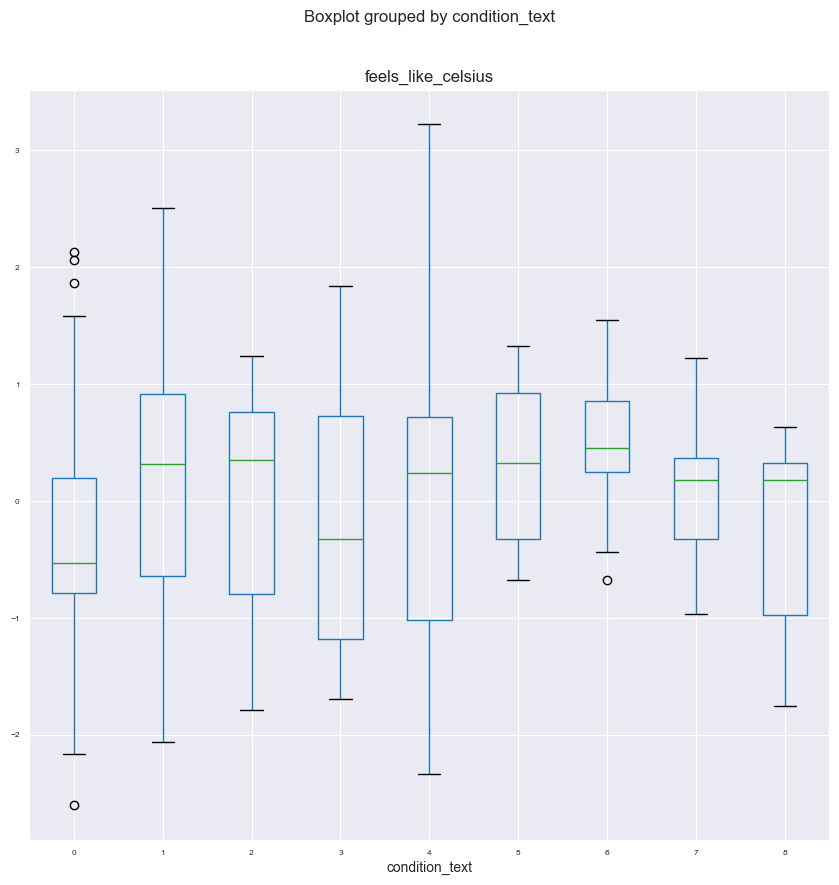

In [161]:
condition = conditions[1] 
feature = features[9] # start from 2
print(feature)

df.boxplot(column=feature, by='condition_text',fontsize=6, figsize=(10,10))
# training_set.boxplot(column='wind_kph', by='condition_text',fontsize=6, figsize=(10,10))


In [162]:
# Import necessary module
dataset = df
# Assuming your DataFrame is named 'dataset'
# Use pandas get_dummies function to one-hot encode 'city_id'
one_hot = pd.get_dummies(dataset['city_id'], prefix='city')

# Drop the 'city_id' column as it is now encoded
dataset = dataset.drop('city_id', axis = 1)

# Join the encoded dataframe to the original dataframe
dataset = dataset.join(one_hot)

# Now 'dataset' has one-hot encoded values for 'city_id'

In [121]:
print(dataset.head())
dataset = dataset.drop('day_id', axis=1)
dataset.to_csv('training_set_one_hot_encoded.csv', index=False)

  day_id  condition_text  temperature_celsius  wind_kph  wind_degree  \
0  D0003               6            -0.325687 -0.976376    -1.491115   
1  D0004               0            -0.791186 -0.634911    -0.084787   
2  D0007               1            -0.170521 -0.921742     1.522446   
3  D0019               0            -0.480854 -0.976376    -0.948674   
4  D0028               1            -0.480854 -0.976376    -0.757815   

   pressure_mb  precip_mm  humidity     cloud  feels_like_celsius  ...  \
0    -0.345813   3.808121  1.160612  0.802314           -0.442245  ...   
1     0.802218  -0.246614  0.506188 -1.269057           -0.791270  ...   
2     0.310205  -0.246614  1.160612  0.111857           -0.325903  ...   
3     0.638214  -0.246614  0.506188 -1.269057           -0.558586  ...   
4    -0.509818  -0.246614 -0.311842 -0.578600           -0.558586  ...   

   city_C103  city_C104  city_C105  city_C106  city_C107  city_C108  \
0      False      False      False      False      

In [163]:
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
csv_file = 'training_set_z_score_normalized.csv'  # Ensure this file contains the 'Labels' column
dataset = pd.read_csv(csv_file)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'city_id' column
city_encoded = encoder.fit_transform(dataset[['city_id']])

# Convert the encoded array back to a DataFrame
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['city_id']))

# Concatenate the encoded DataFrame with the original dataset (dropping the original 'city_id' column)
dataset_encoded = pd.concat([dataset.drop(columns=['city_id']), city_encoded_df], axis=1)

# Display the first few rows of the encoded dataset
print(dataset_encoded.head())

ValueError: Shape of passed values is (479, 1), indices imply (479, 109)